In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)

In [14]:
# Import data
import pandas as pd
df_train = pd.read_csv("Fraud_sampledtrain.csv")
df_test = pd.read_csv("Fraud_train.csv")
df_val = pd.read_csv("Fraud_val.csv")

df_train

,Unnamed: 0,MonthOfAccident,WeekOfMonthOfAccident,MonthClaimed,WeekOfMonthClaimed,AgeOfPolicyHolder,RepNumber,Deductible,DriverRating,PoliceReportFiled,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeRangeOfPolicyHolder,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,FraudFound_P
0,0,1.616388,-1.388694,1.625847,-0.548153,-1.295018,1.418479,-0.174155,0.453743,-0.171366,...,2.0,2.000000,4.000000,3.000000,0.0,2.000000,0.0,0.0,2.000000,0
1,1,-0.684689,-1.388694,-0.678112,-1.341479,-0.971229,-0.967586,-0.174155,0.453743,-0.171366,...,2.0,0.000000,5.000000,4.000000,0.0,3.000000,0.0,0.0,1.000000,0
2,2,-0.972324,0.947134,-0.966107,1.038500,1.052449,0.116989,-0.174155,0.453743,-0.171366,...,0.0,1.000000,7.000000,6.000000,0.0,1.000000,0.0,0.0,1.000000,0
3,3,0.465849,-0.610084,0.761863,1.038500,-1.295018,-1.618330,-0.174155,-1.329373,-0.171366,...,2.0,2.000000,4.000000,3.000000,0.0,0.000000,4.0,1.0,2.000000,0
4,4,-1.547593,1.725744,-1.542097,1.831826,-0.404599,0.333904,-0.174155,1.345301,-0.171366,...,2.0,1.000000,5.000000,4.000000,0.0,0.000000,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16472,16472,-0.267215,-0.823655,-0.051117,-1.123871,0.360465,-0.316841,-0.174155,-1.329373,-0.171366,...,2.0,0.725702,7.000000,5.000000,0.0,1.548596,0.0,0.0,0.274298,1
16473,16473,0.181831,-1.388694,0.189493,-0.280386,0.218709,0.195657,-0.174155,0.754665,-0.171366,...,2.0,0.000000,7.000000,5.337524,0.0,0.662476,0.0,0.0,0.000000,1
16474,16474,-0.761257,-0.402819,-0.678112,1.038500,0.938896,0.333904,-0.174155,1.345301,-0.171366,...,2.0,2.000000,7.000000,6.133099,0.0,0.866901,0.0,0.0,0.866901,1
16475,16475,0.071662,-0.855173,0.177857,-0.548153,-0.487800,-0.688428,-0.174155,1.345301,-0.171366,...,2.0,1.000000,4.342611,4.000000,0.0,3.000000,0.0,0.0,0.000000,1


In [15]:
X_train = df_train.drop(columns=['Unnamed: 0', 'FraudFound_P'])
y_train = df_train['FraudFound_P']

X_test = df_test.drop(columns=['Unnamed: 0', 'FraudFound_P'])
y_test = df_test['FraudFound_P']

X_val = df_test.drop(columns=['Unnamed: 0', 'FraudFound_P'])
y_val = df_test['FraudFound_P']

# 4. Modelling & Evaluation

## 4.1. Supervised Learning

### 4.1.1. KNN (K-Nearest Neighbors)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# K-fold cross validation for different n_neighbors
for i in range (1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    model_knn = knn.fit(X_train, y_train)
    y_test_pred_knn = model_knn.predict(X_test)
    scores = accuracy_score(y_test, y_test_pred_knn)
    print(i, ":", scores)

1 : 0.7753250397530633
2 : 0.7993639509868113
3 : 0.7041436722476849
4 : 0.7249088017959031
5 : 0.6625198765316621
6 : 0.6797306145355907
7 : 0.6266953512300065
8 : 0.639603404732953
9 : 0.5905902160695913
10 : 0.6054625385838556
11 : 0.5612197175194088
12 : 0.5739406977831821
13 : 0.5359648302310355
14 : 0.5484987372556356
15 : 0.5128612851931531
16 : 0.5259564119352726
17 : 0.4928444486016275
18 : 0.5058460387241606
19 : 0.4796557852399214
20 : 0.49162847254700215


In [60]:
# Build the model
KNN = KNeighborsClassifier(n_neighbors = 2)
model_KNN = KNN.fit(X_train, y_train)

# Using the model to predict the results based on the test dataset
y_test_pred_KNN = model_KNN.predict(X_test)

Evaluate:

In [61]:
confusion_matrix(y_test, y_test_pred_KNN)

array([[7909, 2145],
       [   0,  637]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


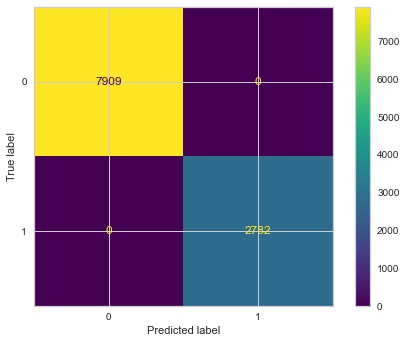

In [72]:
plot_confusion_matrix(KNN, X_test, y_test_pred_KNN)

In [63]:
print(classification_report(y_test, y_test_pred_KNN, target_names=['0','1'], digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.7867    0.8806     10054
           1     0.2290    1.0000    0.3726       637

    accuracy                         0.7994     10691
   macro avg     0.6145    0.8933    0.6266     10691
weighted avg     0.9541    0.7994    0.8503     10691



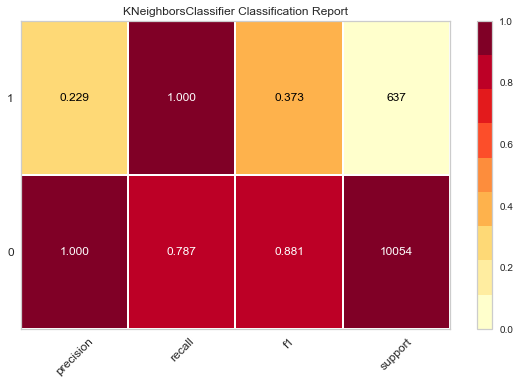

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [68]:
#pip install yellowbrick
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(KNN, classes=['0','1'], support=True, is_fitted=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### 4.1.2. ANN (Artificial Neural Network)

In [65]:
from sklearn.neural_network import MLPClassifier

# Cross-validate with different size of one hidden layer
for i in range (2, 21):    
    model_ANN1 = MLPClassifier(hidden_layer_sizes=(i), max_iter=1000, random_state=0)
    scores = cross_val_score(estimator=model_ANN1, X=X_train, y=y_train, cv=5)
    print(i, ":", np.average(scores))

2 : 0.8672089588520413
3 : 0.8545239735109094
4 : 0.8678767108151509
5 : 0.8592584564727375
6 : 0.8742496169541966
7 : 0.8798939441931729
8 : 0.8929418470173992
9 : 0.8921532146382427
10 : 0.9044738460745171
11 : 0.8938524647524199
12 : 0.8994963315998055
13 : 0.8979186801125566
14 : 0.9105420650588565
15 : 0.9046555534275234
16 : 0.9079334863061126
17 : 0.9155797435066371
18 : 0.9147905218262447
19 : 0.910967503719964
20 : 0.915883307305862


In [66]:
# Cross-validate with different size of two hidden layer
for i in range (2, 21):    
    model_ANN2 = MLPClassifier(hidden_layer_sizes=(i,i), max_iter=1000, random_state=0)
    scores = cross_val_score(estimator=model_ANN2, X=X_train, y=y_train, cv=5)
    print(i, ":", np.average(scores))

2 : 0.6096376902338052
3 : 0.8514289450034621
4 : 0.8780120106958174
5 : 0.8676338082119127
6 : 0.8921528831562974
7 : 0.8979181828896386
8 : 0.8908782614140284
9 : 0.8972513332940466
10 : 0.9055662448251984
11 : 0.9090259403037846
12 : 0.9143658934543366
13 : 0.9158840071010799
14 : 0.9255336491005789
15 : 0.9271713172355879
16 : 0.931480914006217
17 : 0.9316623451242689
18 : 0.9275355790621271
19 : 0.9354872416282394
20 : 0.9303886257495175


In [67]:
# Build the model
ANN = MLPClassifier(hidden_layer_sizes=(19,19), max_iter=1000, random_state=0)
model_ANN = ANN.fit(X_train, y_train)

# Using the model to predict the results based on the test dataset
y_test_pred_ANN = model_ANN.predict(X_test)

In [69]:
confusion_matrix(y_test, y_test_pred_ANN)

array([[8198, 1856],
       [  41,  596]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


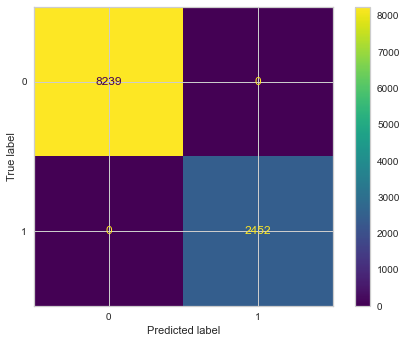

In [71]:
plot_confusion_matrix(ANN, X_test, y_test_pred_ANN)

In [73]:
print(classification_report(y_test, y_test_pred_ANN, target_names=['0','1'], digits=4))

              precision    recall  f1-score   support

           0     0.9950    0.8154    0.8963     10054
           1     0.2431    0.9356    0.3859       637

    accuracy                         0.8226     10691
   macro avg     0.6190    0.8755    0.6411     10691
weighted avg     0.9502    0.8226    0.8659     10691



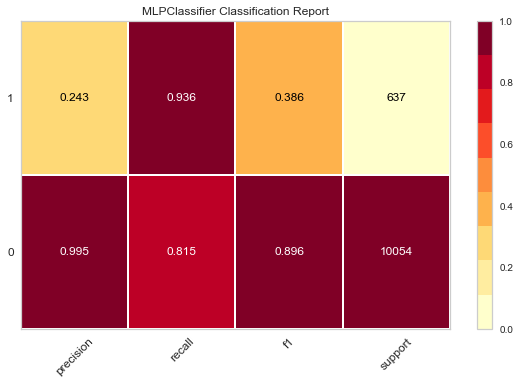

<AxesSubplot:title={'center':'MLPClassifier Classification Report'}>

In [75]:
visualizer = ClassificationReport(ANN, classes=['0','1'], support=True, is_fitted=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()